#### 利用SVM，sklearn对iris数据集进行分类


### Dataset: using the one of most popular classification dataset which is Iris dataset. Iris dataset is having 4 features of iris flower and one target class. The flower species type is the target class which has 3 types.

### The idea of implementing SVM classifier in Python is to use the iris features to train an svm classifier and use the trained svm model to predict the Iris species type.

## 1， Importing Iris dataset from Scikit-Learn and understand Iris dataset

In [2]:
# Required Packages 
from sklearn import datasets
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
%matplotlib inline

In [3]:
# import iris data to model Svm classifier
iris = datasets.load_iris()

In [4]:
# Using the DESCR key over the iris_dataset to describ the dataset
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [5]:
# To get the iris features and the target classes
X = iris.data
y = iris.target
#check the data
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 2， Visualizing the Iris dataset

#### 2.1 Visualizing the relationship between sepal and target classes

In [11]:
X = iris.data[:,:2]
y= iris.target

In [13]:
X[y==0,0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

In [14]:
X[y==0,1]

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3])

In [16]:
pd.DataFrame(X)

,0,1
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


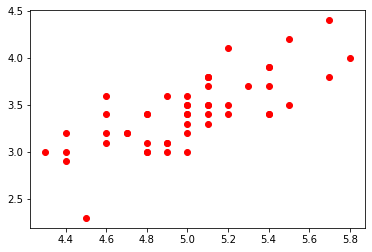

In [18]:
plt.scatter(X[y==0,0],X[y==0,1],color = 'r',marker='o')

Text(0.5, 1.0, 'the relationship between sepal and target classes')

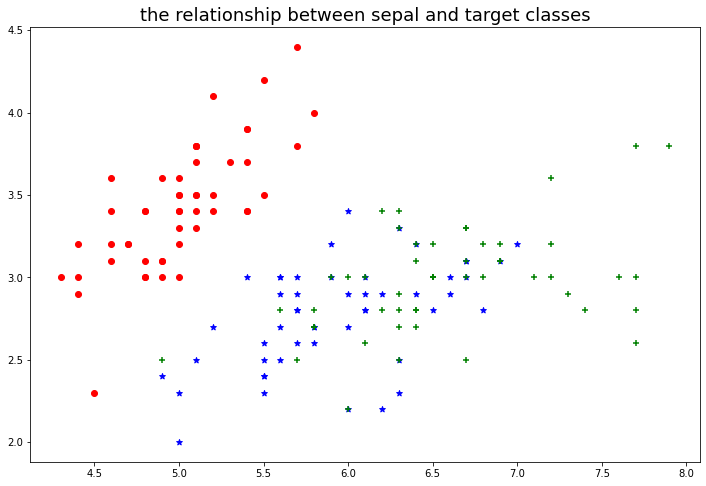

In [24]:
plt.figure(figsize=(12,8))
plt.scatter(X[y==0,0],X[y==0,1],color = 'r',marker='o')
plt.scatter(X[y==1,0],X[y==1,1],color = 'b',marker='*')
plt.scatter(X[y==2,0],X[y==2,1],color = 'g',marker='+')
plt.title('the relationship between sepal and target classes',fontsize = 18)
plt.xlabel('sepal length')
plt.ylabe